In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
state_pops = pd.read_csv('states.csv', index_col=0)

In [4]:
state_pops.head()

,State,2018 Population
Abbrev,,
CA,California,39776830
TX,Texas,28704330
FL,Florida,21312211
NY,New York,19862512
PA,Pennsylvania,12823989


In [36]:
states=['FL', 'NY', 'TX']

In [37]:
def fetch_states(states):
    state_dict = {}
    for state in states:
        population =state_pops.loc[state]['2018 Population']
        df = pd.read_json(f'https://covidtracking.com/api/v1/states/{state.lower()}/daily.json')
        df['date'] = pd.to_datetime(df['date'], format="%Y%m%d")
        df.set_index('date', inplace=True)
        df.sort_index(ascending=True, inplace=True)
        df['positive_7dMA'] = df['positive'].rolling(7).mean()
        df['death_7dMA'] = df['death'].rolling(7).mean()
        df['positive_per100k'] = df['positive']/population*100000
        df['death_per100k'] = df['death']/population*100000
        state_dict[state] = df
    return state_dict

In [38]:
state_dict = fetch_states(states)

In [46]:
def make_state_graphs(state_dict, graph_types):
    for graph_type in graph_types:
        for state, df in state_dict.items():
            df[graph_type].plot(label=state.upper())
        plt.legend([key.upper() for key in state_dict.keys()], loc='upper left')
        plt.show()

In [47]:
graph_types = ['positive', 'positive_per100k', 'death', 'death_per100k']

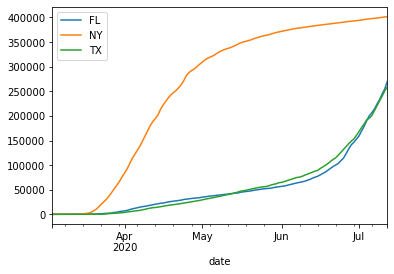

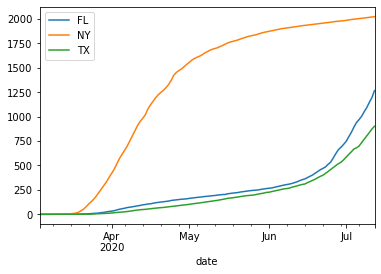

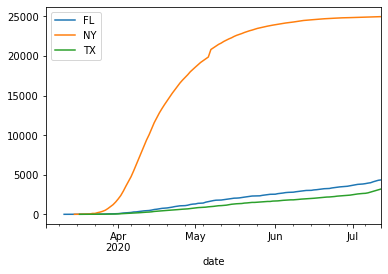

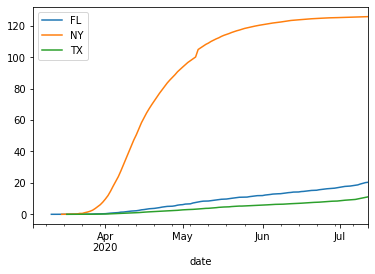

In [48]:
make_graphs(state_dict, graph_types)

# Todo:
* US states positive with 7dMA --
* US states deaths
* per capita positive
* per capital deaths

In [49]:
df2 = pd.read_json('https://services.arcgis.com/g1fRTDLeMgspWrYp/arcgis/rest/services/vDateCOVID19_Tracker_Public/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')

ValueError: arrays must all be same length